In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
train = pd.read_csv("C:/Users/erfwi/source/SureStart/HandWrittenData/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
test = pd.read_csv("C:/Users/erfwi/source/SureStart/HandWrittenData/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y_train = train['label']
x_train = train.drop(labels = ['label'], axis = 1)

c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

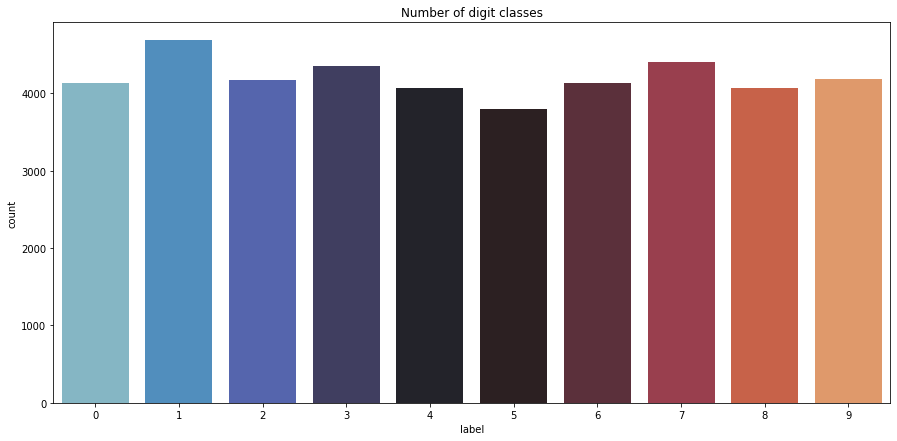

In [135]:
plt.figure(figsize = (15,7))
g = sns.countplot(y_train, palette = "icefire")
plt.title("Number of digit classes")
y_train.value_counts()

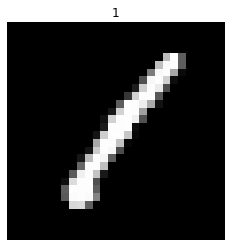

In [136]:
img = x_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

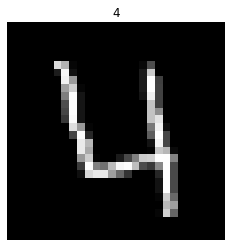

In [137]:
img = x_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [138]:
x_train = x_train / 255.0
test = test / 255.0
print("x_train shape: ", x_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [139]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x_train shape: ", x_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [140]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [141]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_train, y_train, test_size = 0.1, random_state = 1)

print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


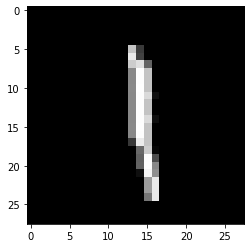

In [142]:
plt.imshow(x_train[2][:,:,0], cmap='gray')
plt.show()

In [143]:
from sklearn.metrics import confusion_matrix
import itertools

In [144]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [145]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [146]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [147]:
epochs = 100
batch_size = 100

In [148]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [149]:
history_data = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test, y_test), steps_per_epoch = x_train.shape[0] // batch_size)

c:\users\erfwi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
378/378 [==============================] - 7s 18ms/step - loss: 1.2925 - accuracy: 0.5565 - val_loss: 0.1444 - val_accuracy: 0.9560
Epoch 2/100
378/378 [==============================] - 7s 18ms/step - loss: 0.3611 - accuracy: 0.8861 - val_loss: 0.0955 - val_accuracy: 0.9707
Epoch 3/100
378/378 [==============================] - 7s 18ms/step - loss: 0.2667 - accuracy: 0.9187 - val_loss: 0.0790 - val_accuracy: 0.9769
Epoch 4/100
378/378 [==============================] - 7s 18ms/step - loss: 0.2304 - accuracy: 0.9284 - val_loss: 0.0672 - val_accuracy: 0.9812
Epoch 5/100
378/378 [==============================] - 7s 18ms/step - loss: 0.2011 - accuracy: 0.9357 - val_loss: 0.0580 - val_accuracy: 0.9840
Epoch 6/100
378/378 [==============================] - 7s 19ms/step - loss: 0.1951 - accuracy: 0.9418 - val_loss: 0.0563 - val_accuracy: 0.9819
Epoch 7/100
378/378 [==============================] - 7s 19ms/step - loss: 0.1717 - accuracy: 0.9472 - val_loss: 0.0550 - val_accuracy:

378/378 [==============================] - 7s 19ms/step - loss: 0.0774 - accuracy: 0.9753 - val_loss: 0.0317 - val_accuracy: 0.9886
Epoch 58/100
378/378 [==============================] - 7s 18ms/step - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 59/100
378/378 [==============================] - 7s 18ms/step - loss: 0.0769 - accuracy: 0.9762 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 60/100
378/378 [==============================] - 7s 18ms/step - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0298 - val_accuracy: 0.9902
Epoch 61/100
378/378 [==============================] - 7s 19ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch 62/100
378/378 [==============================] - 7s 18ms/step - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 63/100
378/378 [==============================] - 7s 18ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0275 - val_accuracy: 0.991

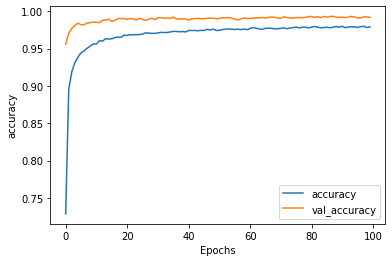

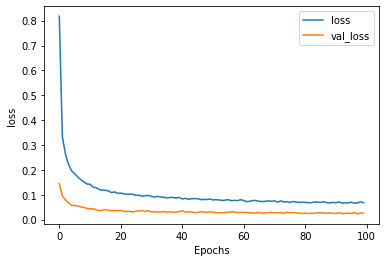

In [150]:
import matplotlib.pyplot as plt
def plot_data(history, string):
  plt.plot(history_data.history[string])
  plt.plot(history_data.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_data(history_data, "accuracy")
plot_data(history_data, "loss")

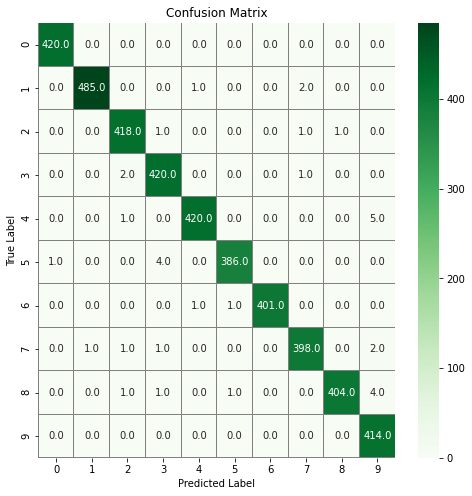

In [151]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()